In [55]:
# Add in the neccesary libraries and depedencies
# First precompile takes more time -> Julia creates a underlying type-structure so that it can exploit the JIT feature
using Plots
using Makie
using GraphMakie.NetworkLayout
using CairoMakie
using Tenet
using TensorOperations
using LinearAlgebra
using Graphs
using GraphPlot
using EinExprs
using Combinatorics
using LaTeXStrings
Makie.inline!(true)
include("julia_functions.jl")



edge_weights_update_DRMG_chi_max (generic function with 1 method)

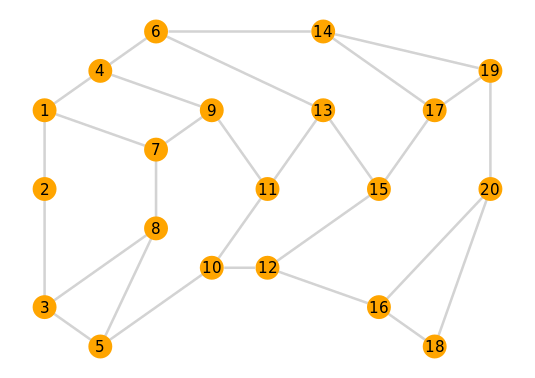

{20, 29} undirected simple Int64 graph

In [56]:
function generate_loop_graph_n20()
    
    g = SimpleGraph(20)
    add_edge!(g, (1,2))
    add_edge!(g, (1,4))
    add_edge!(g, (1,7))
    add_edge!(g, (4,9))
    add_edge!(g, (7,9))
    add_edge!(g, (2,3))
    add_edge!(g, (3,5))
    add_edge!(g, (3, 8))
    add_edge!(g, (7,8))
    add_edge!(g, (5,8))
    add_edge!(g, (5,10))
    add_edge!(g, (10,12))
    add_edge!(g, (10, 11))
    add_edge!(g, (9, 11))
    add_edge!(g, (4,6))
    add_edge!(g, (6,13))
    add_edge!(g, (11,13))
    add_edge!(g, (12,15))
    add_edge!(g, (12,16))
    add_edge!(g, (16,18))
    add_edge!(g, (18,20))
    add_edge!(g, (6,14))
    add_edge!(g, (14,17))
    add_edge!(g, (17,19))
    add_edge!(g, (19,20))
    add_edge!(g, (13,15))
    add_edge!(g, (16,20))
    add_edge!(g, (14,19))
    add_edge!(g, (15,17))


    #Planar representation
    locs_x =     [-4, -4, -4, -3, -3, -2, -2, -2, -1, -1, 0, 0, 1, 1, 2, 2, 3, 3, 4 ,4]   
    locs_y = -1*[2, 0, -3, 3, -4, 4, 1, -1, 2, -2, 0, -2, 2, 4, 0, -3, 2, -4, 3, 0]
    display(gplot(g, locs_x, locs_y, nodelabel=[node for node in 1:nv(g)], nodefillc= colorant"orange"))
    return g
end


g = generate_loop_graph_n20()


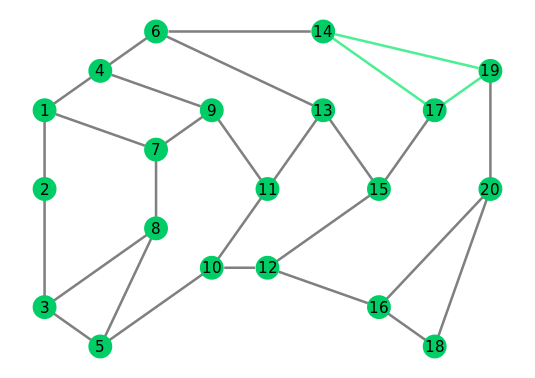

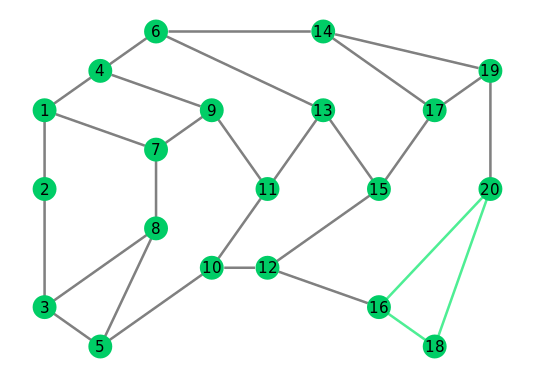

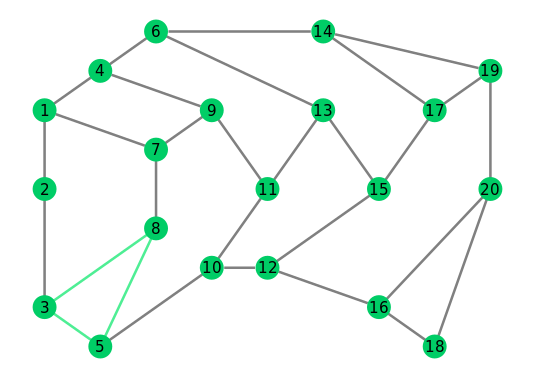

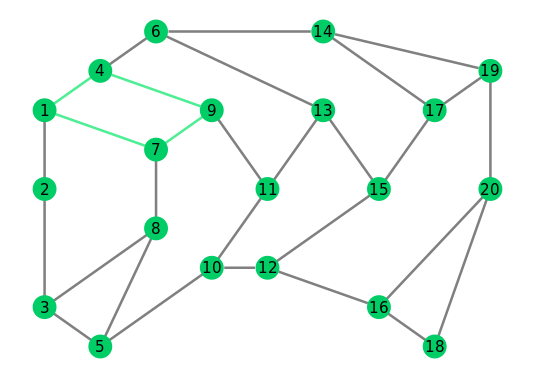

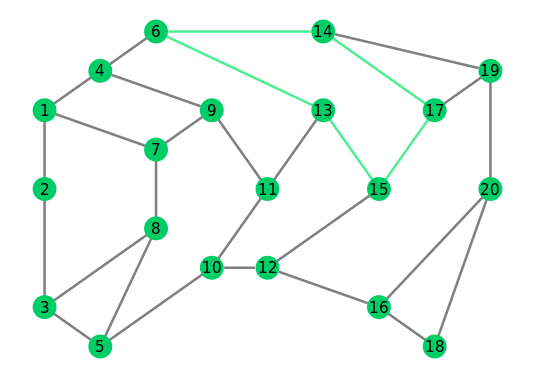

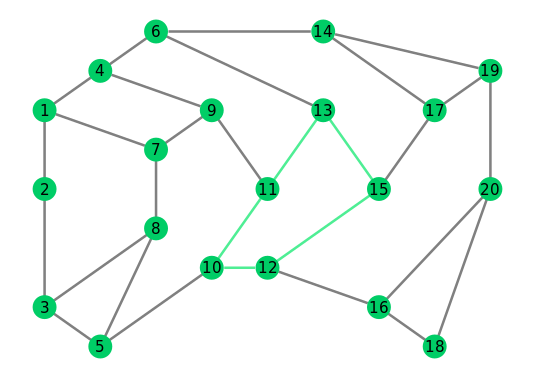

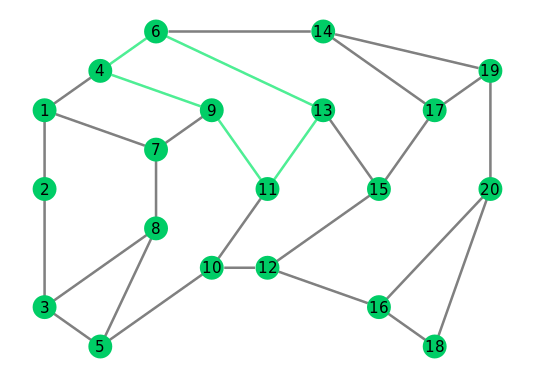

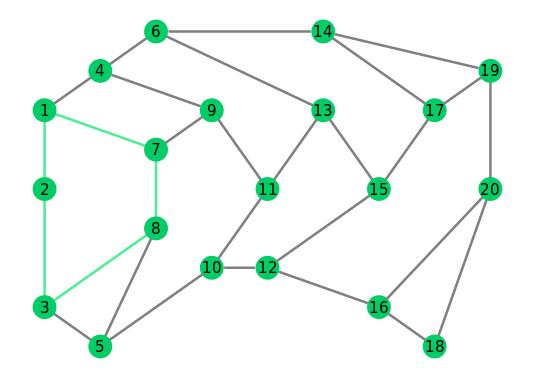

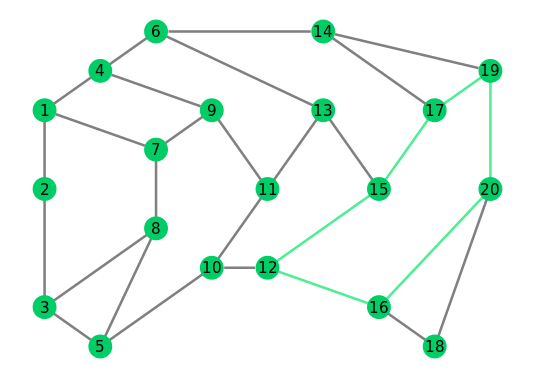

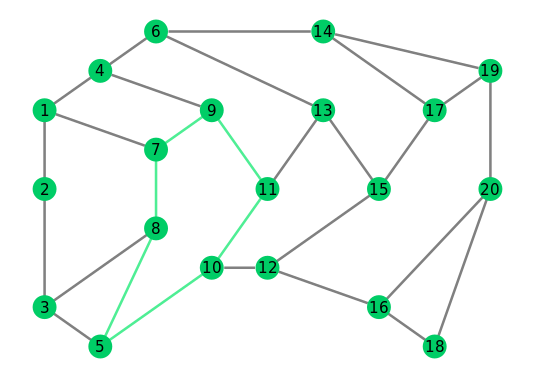

In [57]:
function cycle_visualisation(graph, cycle, locs_x, locs_y)

    """
    This function takes in a graph from graphs.jl, a cycle from the 
    cycle basis of the graph. By generating a graphplot with a 
    color code the selected cycle is visualized.
    """

    nodes = [node for node in vertices(graph)]
    loop_active, dang_active = extract_edge_representation_and_physical_indices(graph, cycle)
    colors_for_edges = []
    for edge in edges(graph)
        s = src(edge)
        d = dst(edge)
        
        if Tuple((Int(s), Int(d))) in loop_active
            push!(colors_for_edges, colorant"seagreen2")
            continue
        end
        
        push!(colors_for_edges, colorant"grey")
    end


    display(gplot(graph, locs_x, locs_y, edgestrokec = colors_for_edges, nodelabel=nodes, nodefillc=colorant"springgreen3"))
    
end




locs_x =     [-4, -4, -4, -3, -3, -2, -2, -2, -1, -1, 0, 0, 1, 1, 2, 2, 3, 3, 4 ,4]   
locs_y = -1*[2, 0, -3, 3, -4, 4, 1, -1, 2, -2, 0, -2, 2, 4, 0, -3, 2, -4, 3, 0]

cycles = minimum_cycle_basis(g)
for cycle in cycles
    cycle_visualisation(g, cycle, locs_x, locs_y)
end
    


